In [64]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt

# **Informacion toal de Equipos**

In [65]:
df = pd.read_csv('../../Datasett/equipos.csv')

In [66]:
# Cambio de nombres de las columnas
# df.rename(columns={'Franchise': 'Equipos', 'Champ': 'Campeonatos'}, inplace=True)
# df.head()

In [67]:
# borrar colimnas que no sirven
# df.drop(columns=["Lg",'From', "To"], inplace=True)

# df.head()

#### Graficos

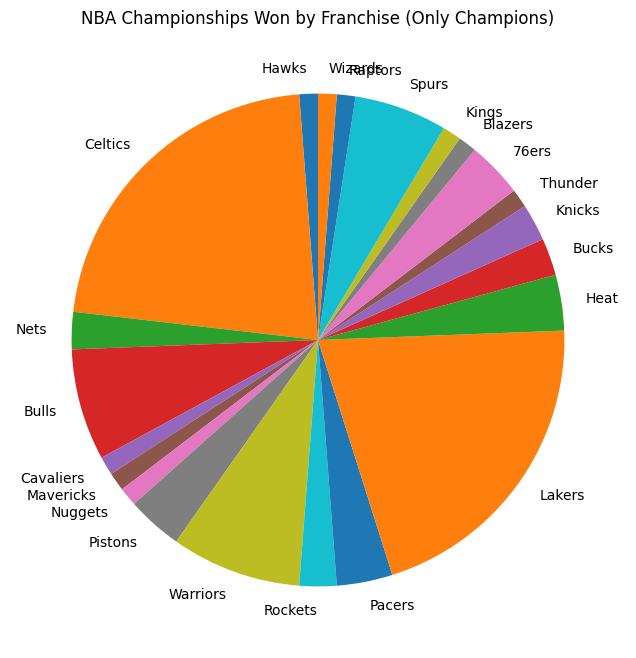

In [68]:

# Filtrar solo los equipos que han ganado al menos un campeonato
df_champs = df[df['Champ'] > 0]

# Crear gráfico de pastel más grande sin porcentajes, solo colores y etiquetas
plt.figure(figsize=(8, 8))  # Cambiar el tamaño a 12x12
plt.pie(df_champs['Champ'], labels=df_champs['Franchise'], startangle=90)
plt.title('NBA Championships Won by Franchise (Only Champions)')
plt.show()

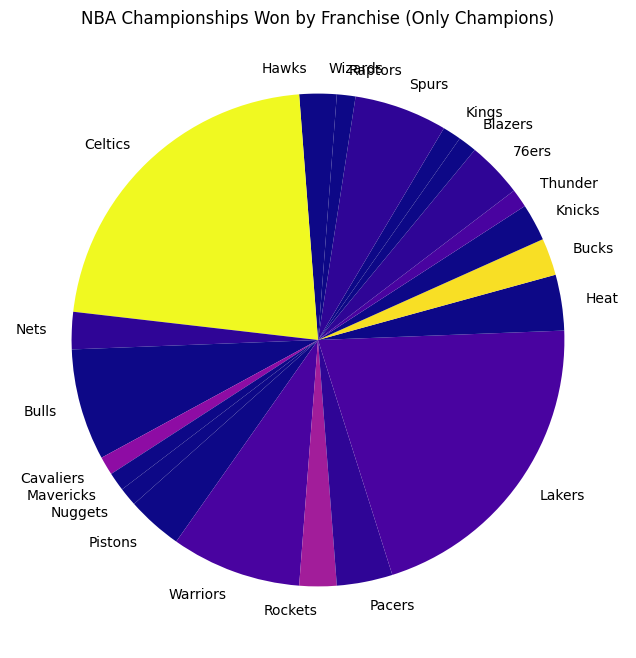

<Figure size 640x480 with 0 Axes>

In [69]:
import numpy as np

# Crear una lista de colores basada en el número de campeonatos

# Normalizar los valores de campeonatos para obtener una escala de colores más claros
norm = plt.Normalize(df_champs['Champ'].min(), df_champs['Champ'].max())
colors = plt.cm.plasma(norm(df['Champ']))

# Crear gráfico de pastel con colores basados en el número de campeonatos
plt.figure(figsize=(8, 8))
plt.pie(df_champs['Champ'], labels=df_champs['Franchise'], startangle=90, colors=colors)
plt.title('NBA Championships Won by Franchise (Only Champions)')

# Mostrar el gráfico
plt.show()

# Guardar el gráfico en un archivo
plt.savefig('nba_championships_pie_chart.png')


# **Informacion de equipos en la temorada 2023 - 2024**

In [70]:
# Cargar el archivo CSV
df_team = pd.read_csv('../../Datasett/TeamSeason23_24.csv')
df_team.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Indiana Pacers,82,19705,3855,7599,0.507,1082,2891,0.374,2773,...,0.782,827,2578,3405,2522,631,481,1059,1756,10110
1,Boston Celtics,82,19830,3601,7396,0.487,1351,3482,0.388,2250,...,0.807,876,2923,3799,2207,557,538,979,1326,9887
2,Oklahoma City Thunder,82,19805,3653,7324,0.499,1090,2805,0.389,2563,...,0.825,722,2725,3447,2223,694,538,1039,1545,9847
3,Milwaukee Bucks,82,19805,3538,7258,0.487,1163,3122,0.373,2375,...,0.774,772,2850,3622,2176,558,413,1059,1574,9756
4,Atlanta Hawks,82,19855,3529,7584,0.465,1125,3092,0.364,2404,...,0.797,1024,2639,3663,2180,615,369,1110,1522,9703


### Informacion Columnas:

- **Rk**: Rango
- **G**: Juegos Jugados
- **MP**: Minutos Jugados
- **FG**: Canastas de Campo
- **FGA**: Intentos de Canasta de Campo
- **FG%**: Porcentaje de Canastas de Campo
- **3P**: Triples Encestados
- **3PA**: Intentos de Triple
- **3P%**: orcentaje de Triples
- **2P**: obles Encestados
- **2PA**: ntentos de Dobles
- **2P%**: Porcentaje de Dobles
- **FT**: Tiros Libres Encestados
- **FTA**: ntentos de Tiro Libre
- **FT%**: orcentaje de Tiros Libres
- **ORB**: ebotes Ofensivos
- **DRB**: Rebotes Defensivos
- **TRB**: ebotes Totales
- **AST**: sistencias
- **STL**: obos
- **BLK**: Bloqueos
- **TOV**: Pérdidas de Balón
- **PF**: Faltas Personales
- **PTS**: Puntos


### Modificacion de columnas

In [71]:
# Crear columna PTS_por_juego
df_team['PTS_por_juego'] = df_team['PTS'] / 82
df_team['PTS_por_juego'] = df_team['PTS_por_juego'].astype(int)

df_team.head()

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS_por_juego
0,Indiana Pacers,82,19705,3855,7599,0.507,1082,2891,0.374,2773,...,827,2578,3405,2522,631,481,1059,1756,10110,123
1,Boston Celtics,82,19830,3601,7396,0.487,1351,3482,0.388,2250,...,876,2923,3799,2207,557,538,979,1326,9887,120
2,Oklahoma City Thunder,82,19805,3653,7324,0.499,1090,2805,0.389,2563,...,722,2725,3447,2223,694,538,1039,1545,9847,120
3,Milwaukee Bucks,82,19805,3538,7258,0.487,1163,3122,0.373,2375,...,772,2850,3622,2176,558,413,1059,1574,9756,118
4,Atlanta Hawks,82,19855,3529,7584,0.465,1125,3092,0.364,2404,...,1024,2639,3663,2180,615,369,1110,1522,9703,118


In [72]:
# cambiar el nombre de la columna
df_team = df_team.rename(columns={'Team': 'Equipo'})

### GRAFICO

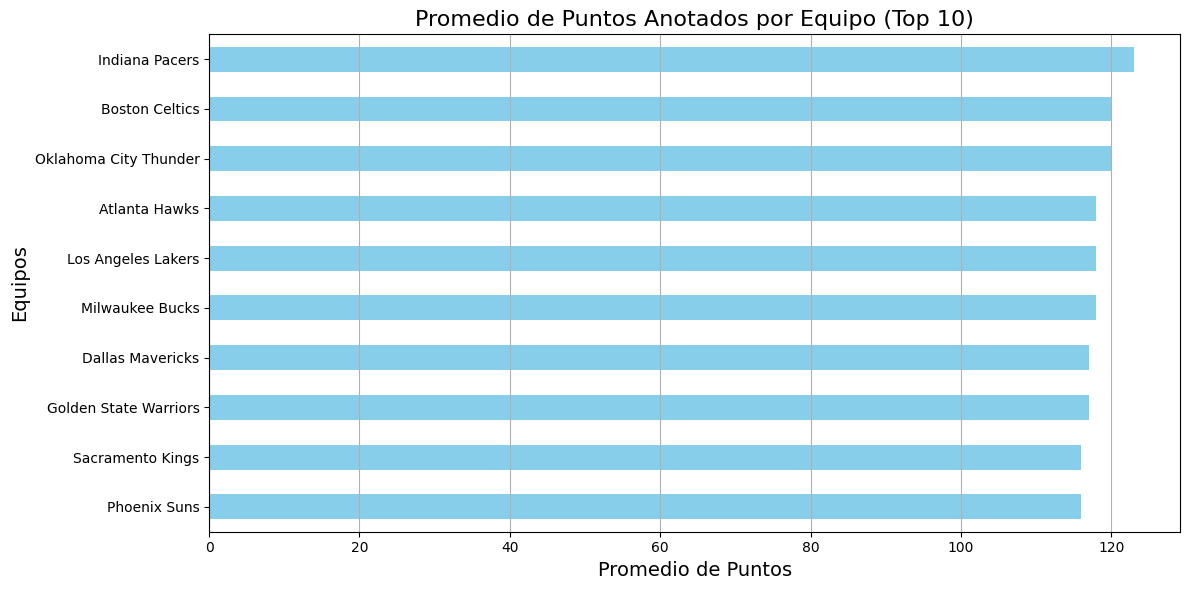

In [73]:
# Promedio de puntos por equipo
avg_pts = df_team.groupby('Equipo')['PTS_por_juego'].mean().sort_values()

top_10_avg_pts = avg_pts.nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 6))
top_10_avg_pts.plot(kind='barh', color='skyblue')

plt.title('Promedio de Puntos Anotados por Equipo (Top 10)', fontsize=16)
plt.xlabel('Promedio de Puntos', fontsize=14)
plt.ylabel('Equipos', fontsize=14)
plt.grid(axis='x')

plt.tight_layout()
plt.show()


# **Informacion de jugadores en la temorada 2023 - 2024**

In [81]:
# Cargar el archivo CSV especificando la codificación y el separador ;
df_players = pd.read_csv('../../Datasett/PlayerSeason23_24.csv', sep=';', encoding='latin1')
df_players.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


### Informacion Columnas:

- **Rk** : Rango
- **Player** : Nombre del jugador
- **Pos** : Posición
- **Age** : Edad del jugador
- **Tm** : Equipo
- **G** : Juegos jugados
- **GS** : Juegos iniciados
- **MP** : Minutos jugados por juego
- **FG** : Canastas de campo por juego
- **FGA** : Intentos de canasta de campo por juego
- **FG%** : Porcentaje de canastas de campo
- **3P** : Triples por juego
- **3PA** : Intentos de triple por juego
- **3P%** : Porcentaje de triples
- **2P** : Dobles por juego
- **2PA** : Intentos de dobles por juego
- **2P%** : Porcentaje de dobles
- **eFG%** : Porcentaje de tiro de campo efectivo
- **FT** : Tiros libres por juego
- **FTA** : Intentos de tiro libre por juego
- **FT%** : Porcentaje de tiros libres
- **ORB** : Rebotes ofensivos por juego
- **DRB** : Rebotes defensivos por juego
- **TRB** : Rebotes totales por juego
- **AST** : Asistencias por juego
- **STL** : Robos por juego
- **BLK** : Bloqueos por juego
- **TOV** : Pérdidas de balón por juego
- **PF** : Faltas personales por juego
- **PTS** : Puntos por juego


### Modificacion de columnas


### GRAFICO